## Setup environment

In [1]:
from simulators.grid_world.grid_world import Maze
from simulators.grid_world.metrics import compute_bad_steps

grid_type = "simple"

feature_type = "one_hot"
dimensions = 124
sigma = None

# feature_type = "simularity"
# dimensions = 100
# sigma = 0.25

n_tries_for_std = 10

env = Maze(grid_type, feature_type, dimensions=dimensions, sigma=sigma)

### Change reward to granular setting

In [2]:
from simulators.grid_world.grid_world import set_granular_reward, set_normilized_reward, divide_reward_by

env = set_granular_reward(env)
env = set_normilized_reward(env)
env = divide_reward_by(env, 10)

## LSPI

#### Check with only demonstrations

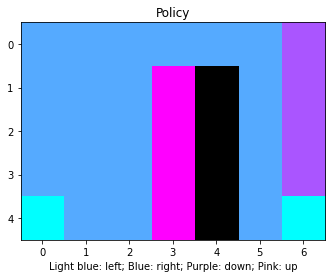

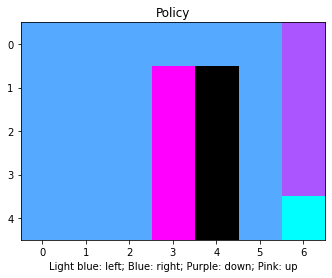

Number of bad policy: 0


In [5]:
from algorithms.API.lstd import lstd_grid_word

n_expert_samples = 200
n_rl_samples = 0
regularisor = 0.1
regularisor_bellmann = 0.1
max_iteration = 2
epsilon_decay_limit = None
regularisor_expert = 0  # make LSPI
# expert_loss_name = "penalizer"
# expert_penality = 0.15
expert_loss_name = None
expert_penality = None

show_args = {"show_policy":True, "show_value_function": False, "show_statistics": False}

lspi_Q, lspi_policy = lstd_grid_word(
    env,
    n_expert_samples,
    n_rl_samples,
    regularisor,
    regularisor_bellmann,
    max_iteration,
    epsilon_decay_limit,
    regularisor_expert,
    expert_loss_name,
    expert_penality,
    **show_args
)
print("Number of bad policy:", compute_bad_steps(env, lspi_policy))

#### Compute real algorithm

In [5]:
import time 
import numpy as np

from tqdm import tqdm 
from algorithms.API.lstd import lstd_grid_word

n_expert_samples = 20
n_rl_samples = 100
regularisor = 0.1
regularisor_bellmann = 0.1
max_iteration = 10
epsilon_decay_limit = 0
regularisor_expert = 0  # make LSPI
# expert_loss_name = "large_margin"
# expert_loss_name = "penalizer"
# expert_penality = 0.15
expert_loss_name = None
expert_penality = None

show_args = {"show_policy":False, "show_value_function": False, "show_statistics": False}

time_algorithm = []
bad_policies = []

for n_try in tqdm(range(n_tries_for_std)):
    time_begin = time.time()
    lspi_Q, lspi_policy = lstd_grid_word(
        env,
        n_expert_samples,
        n_rl_samples,
        regularisor,
        regularisor_bellmann,
        max_iteration,
        epsilon_decay_limit,
        regularisor_expert,
        expert_loss_name,
        expert_penality,
        **show_args
    )
    time_algorithm.append(time.time() - time_begin)
    bad_policies.append(compute_bad_steps(env, lspi_policy))

print(f"Bad policies: {np.around(np.mean(bad_policies), 3)} +- {np.around(np.std(bad_policies), 3)}")
print(f"Average time {np.around(np.mean(time_algorithm), 3)} +- {np.around(np.std(time_algorithm), 3)}")

100%|██████████| 10/10 [00:03<00:00,  2.93it/s]

Bad policies: 10.9 +- 2.587
Average time 0.337 +- 0.037


## APID

#### Use of the penalizer loss

In [9]:
import time 
import numpy as np

from tqdm import tqdm 
from algorithms.API.lstd import lstd_grid_word

n_expert_samples = 20
n_rl_samples = 100
regularisor = 0.1
regularisor_bellmann = 0.1
max_iteration = 10
epsilon_decay_limit = 0
regularisor_expert = 0.1
expert_loss_name = "penalizer"
expert_penality = 0.01
# expert_loss_name = None
# expert_penality = None

show_args = {"show_policy":False, "show_value_function": False, "show_statistics": False}

time_algorithm = []
bad_policies = []

for n_try in tqdm(range(n_tries_for_std)):
    time_begin = time.time()
    lspi_Q, lspi_policy = lstd_grid_word(
        env,
        n_expert_samples,
        n_rl_samples,
        regularisor,
        regularisor_bellmann,
        max_iteration,
        epsilon_decay_limit,
        regularisor_expert,
        expert_loss_name,
        expert_penality,
        **show_args
    )
    time_algorithm.append(time.time() - time_begin)
    bad_policy = compute_bad_steps(env, lspi_policy)
    print(bad_policy)
    bad_policies.append(bad_policy)

print(f"Bad policies: {np.around(np.mean(bad_policies), 3)} +- {np.around(np.std(bad_policies), 3)}")
print(f"Average time {np.around(np.mean(time_algorithm), 3)} +- {np.around(np.std(time_algorithm), 3)}")

  0%|          | 0/10 [00:00<?, ?it/s]

! Warning ! Stopped before convergence
Grad norm 0.011810341763857351
! Warning ! Stopped before convergence
Grad norm 0.013287669165788095
! Warning ! Stopped before convergence
Grad norm 0.019411982492751972
! Warning ! Stopped before convergence
Grad norm 0.017770177036523775
! Warning ! Stopped before convergence
Grad norm 0.022607899422010195
! Warning ! Stopped before convergence
Grad norm 0.02177803089659469
! Warning ! Stopped before convergence
Grad norm 0.013435105620568245
! Warning ! Stopped before convergence
Grad norm 0.012588368445185166


 10%|█         | 1/10 [00:29<04:21, 29.01s/it]

! Warning ! Stopped before convergence
Grad norm 0.018550248244137924
10
! Warning ! Stopped before convergence
Grad norm 0.016454957256068842
! Warning ! Stopped before convergence
Grad norm 0.015483323888172496
! Warning ! Stopped before convergence
Grad norm 0.026711045754247917
! Warning ! Stopped before convergence
Grad norm 0.016046261698917135
! Warning ! Stopped before convergence
Grad norm 0.014601935268881507
! Warning ! Stopped before convergence
Grad norm 0.014023621677131268
! Warning ! Stopped before convergence
Grad norm 0.0157181227413839
! Warning ! Stopped before convergence
Grad norm 0.014187337133463353


 20%|██        | 2/10 [00:53<03:28, 26.06s/it]

! Warning ! Stopped before convergence
Grad norm 0.020193924028927616
8


 20%|██        | 2/10 [00:54<03:36, 27.10s/it]


KeyboardInterrupt: 